In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline


The DE system for a projectile with quadratic drag is:
$$
m\dot{v}_x = -c \sqrt{v_x^2 + v_y^2} v_x
$$
$$ 
m\dot{v}_y = -mg - c \sqrt{v_x^2 + v_y^2} v_y
$$
where $c = \frac{\sqrt{mg}}{v_\text{ter}}$

This can be rewritten 
$$ \dot{v}_x = - \frac {g}{ v_\text{ter}^2} {v v_x} $$
$$ \dot{v}_y = - g - \frac {g }{v_\text{ter}^2} {v v_y} $$
with the speed $v = \sqrt{v_x^2 + v_y^2}$.

In [6]:
def dsdt(s,t,vter=40, g = 9.8):
    """derivatives of projectile system with quadratic drag s = [x,y,vx,vy], vter = terminal speed."""
    x, y, vx, vy = s
    v = np.sqrt(vx*vx + vy*vy)
    vxdot = -g*v*vx/vter/vter
    vydot = -g - g*v*vy/vter/vter
    return [vx, vy, vxdot, vydot]

In [152]:
ttry = np.linspace(0, 50,200)
angle = 85/57.29
v0 = 158 # muzzle speed
vtr = 286 # terminal v
s0 = [0.0, 0.0, v0*np.cos(angle), v0*np.sin(angle)]

In [153]:
sol = odeint(dsdt,s0,ttry, args=(vtr,10))


In [154]:
x = sol[:,0]
y = sol[:,1]

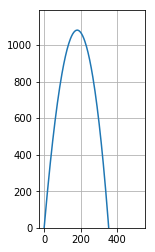

In [155]:
plt.plot(x,y)
plt.axis('scaled')
plt.ylim(0,1.1*max(y))
plt.grid()

In [164]:
(max(ttry[np.where(y>0)])+min(ttry[np.where(y<0)]))/2 # find time of flight

29.522613065326631